## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
combined_df= mouse_metadata.merge(study_results, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
652,c282,Placebo,Male,12,27,20,51.950574,0
1023,j984,Stelasyn,Female,2,30,45,70.653832,1
1127,l661,Ceftamin,Male,18,26,20,52.617490,1
644,c264,Zoniferol,Female,11,27,30,57.823916,2
796,e476,Infubinol,Male,23,26,25,57.408638,0
1674,w167,Placebo,Female,6,28,15,53.900489,0
562,a818,Naftisol,Female,12,28,20,54.834624,0
251,i334,Ramicane,Female,8,20,30,39.005554,1
1892,z969,Naftisol,Male,9,30,45,73.867845,4
889,g558,Propriva,Male,8,29,20,55.090097,1


In [2]:
# Checking the number of mice.
num_cases = len(combined_df)
print(f'Number of Cases = {num_cases}')

num_mice = len(combined_df['Mouse ID'].unique())
print(f'Number of Mice = {num_mice}')

Number of Cases = 1893
Number of Mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_mask = combined_df.duplicated(subset=['Mouse ID'])

dupe_mice = combined_df[dupe_mouse_mask].sample(100)
dupe_timepoint = dupe_mice.duplicated(subset=['Timepoint'])
mice_duplicates = pd.DataFrame({'Mouse ID': dupe_mice[dupe_timepoint]['Mouse ID']})

print(mice_duplicates)

#clean_df = combined_df.query("Mouse ID in mice_duplicates")


     Mouse ID
924      h246
1423     q582
788      e291
634      c139
1049     k483
...       ...
1549     t451
911      g989
112      n364
1198     m650
1058     k510

[91 rows x 1 columns]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
unclean_df = combined_df[combined_df.isin(mice_duplicates)]
#unclean_df.to_excel('optional_unclean.xlsx', engine='xlsxwriter') 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df.isin(mice_duplicates)].dropna()
#clean_df.to_excel('output1.xlsx', engine='xlsxwriter') 

In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean_df = len(clean_df['Mouse ID'].unique())
print(f'Number of Mice that have no Timepoint duplication: {count_clean_df}')

Number of Mice that have no Timepoint duplication: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_clean = clean_df.groupby(by=['Drug Regimen'])
clean_df_mean = grouped_clean.mean()
clean_df_median = grouped_clean.median()
clean_df_var = grouped_clean.var()
clean_df_stdev = grouped_clean.std()
clean_df_sem = grouped_clean.sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'TumorVol Mean':clean_df_mean['Tumor Volume (mm3)'],
                                'TumorVol Median':clean_df_median['Tumor Volume (mm3)'],
                                'TumorVol Variance':clean_df_var['Tumor Volume (mm3)'],
                                 'TumorVol StdDev':clean_df_stdev['Tumor Volume (mm3)'],
                                 'TumorVol StdErr':clean_df_sem['Tumor Volume (mm3)']})


summary_stats_df


,TumorVol Mean,TumorVol Median,TumorVol Variance,TumorVol StdDev,TumorVol StdErr
Drug Regimen,,,,,
Capomulin,40.857832,41.763013,24.268933,4.926351,0.332135
Ceftamin,52.448754,51.207969,39.912039,6.317598,0.483119
Infubinol,52.673822,51.532750,43.747634,6.614199,0.510297
Ketapril,55.170747,53.646168,70.953278,8.423377,0.633140
Naftisol,54.185938,52.079510,66.026170,8.125649,0.610761
Placebo,54.088640,52.288934,62.114207,7.881257,0.606251
Propriva,52.306375,50.446266,44.026658,6.635259,0.538191
Ramicane,40.217217,40.668343,23.266572,4.823544,0.325945
Stelasyn,54.180630,52.331228,60.093303,7.751987,0.591083


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped = clean_df.groupby(by='Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
df_grouped['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.857832,41.763013,24.268933,4.926351,0.332135
Ceftamin,52.448754,51.207969,39.912039,6.317598,0.483119
Infubinol,52.673822,51.532750,43.747634,6.614199,0.510297
Ketapril,55.170747,53.646168,70.953278,8.423377,0.633140
Naftisol,54.185938,52.079510,66.026170,8.125649,0.610761
Placebo,54.088640,52.288934,62.114207,7.881257,0.606251
Propriva,52.306375,50.446266,44.026658,6.635259,0.538191
Ramicane,40.217217,40.668343,23.266572,4.823544,0.325945
Stelasyn,54.180630,52.331228,60.093303,7.751987,0.591083


## Bar and Pie Charts

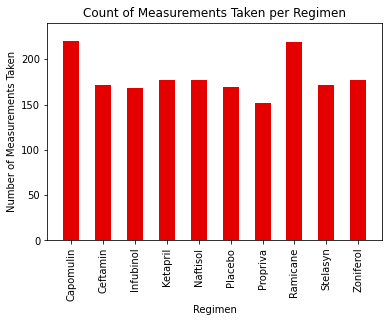

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cmap = ListedColormap(['#e50000'])
grouped_count_byRegimen = grouped_clean['Mouse ID'].count()

count_gph = grouped_count_byRegimen.plot.bar(x=0,y=1,colormap=cmap)

count_gph.set_xlabel('Regimen')
count_gph.set_ylabel('Number of Measurements Taken')
count_gph.set_title('Count of Measurements Taken per Regimen')

count_gph.set_ylim(0,240)
count_gph.set_xlim(-.75,9.75)

count_gph

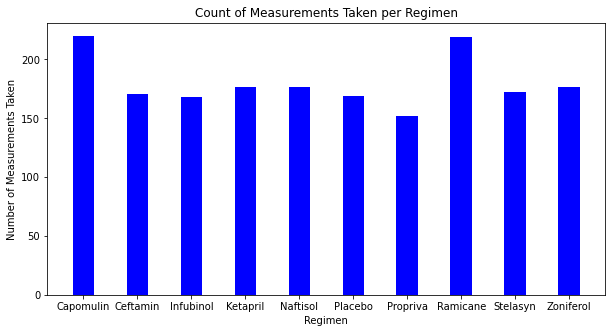

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

fig = plt.figure(figsize = (10, 5))
x_values = grouped_count_byRegimen.index.tolist()
y_values = grouped_count_byRegimen
plt.bar(x_values,y_values, color ='blue', width = 0.4)
  
plt.xlabel("Regimen") 
plt.ylabel("Number of Measurements Taken") 
plt.title("Count of Measurements Taken per Regimen") 
plt.show() 

Text(0.5, 1.0, 'Number of Mice per Gender')

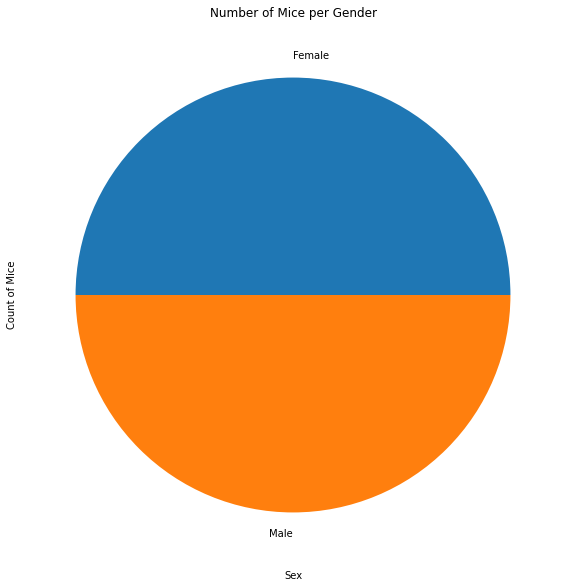

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_sex = clean_df.groupby(by=['Sex']).count()
grouped_sex_df = grouped_sex['Mouse ID']

plot = grouped_sex_df.plot.pie(figsize=(10, 10))
plot.set_xlabel('Sex')
plot.set_ylabel('Count of Mice')
plot.set_title('Number of Mice per Gender')


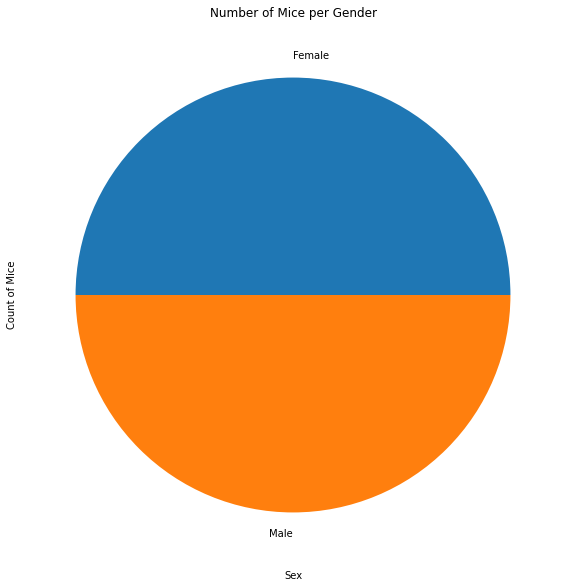

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_values = grouped_sex_df.index.tolist()
y_values = grouped_sex_df

fig = plt.figure(figsize=(10, 10)) 
plt.pie(y_values, labels=x_values)

plt.xlabel("Sex") 
plt.ylabel("Count of Mice") 
plt.title("Number of Mice per Gender") 
plt.show() 

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_df = filtered_df[filtered_df['Timepoint'] == filtered_df.groupby('Mouse ID')['Timepoint'].transform('max')]

max_timepoint_df = max_timepoint_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
finalvol_df = max_timepoint_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Vol'})
finalvol_df

,Mouse ID,Drug Regimen,Final Tumor Vol
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
37,m601,Capomulin,30.834357
49,g791,Ramicane,29.128472
...,...,...,...
1797,x822,Ceftamin,61.386660
1813,y163,Infubinol,67.685569
1845,y769,Ceftamin,68.594745
1855,y865,Ceftamin,64.729837


In [81]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data = finalvol_df['Final Tumor Vol']
IQR = st.iqr(data, interpolation = 'midpoint') 
data_median = data.median()  

upper_bound = data_median + (.5*IQR)
lower_bound = data_median - (.5*IQR)

print(IQR)
print(upper_bound)
print(lower_bound)

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
outliers=[]

upper_df = finalvol_df.loc[(finalvol_df["Final Tumor Vol"] > upper_bound)]
lower_df = finalvol_df.loc[(finalvol_df["Final Tumor Vol"] < lower_bound)]
outliers.append(upper_df)
outliers.append(lower_df)




22.647090805000005
56.3235454025
33.6764545975


,Mouse ID,Drug Regimen,Final Tumor Vol
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
37,m601,Capomulin,30.834357
49,g791,Ramicane,29.128472
59,s508,Ramicane,30.276232
63,f966,Capomulin,32.623003
74,m546,Ramicane,30.564625
84,z578,Ramicane,30.638696
94,j913,Ramicane,31.560470


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

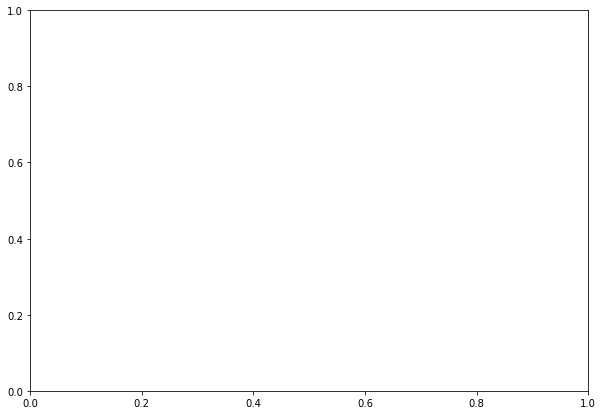

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = finalvol_df.groupby(by=['Drug Regimen'])
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(data) 
  
# show plot 
plt.show() 

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
